<a href="https://colab.research.google.com/github/Elly0816/Data-Science/blob/main/Programming_Languages_Popularity_StackOverflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [27]:
df = pd.read_csv('QueryResults.csv', header=0, names=['Month', 'Language', 'Count'])  

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [28]:
df.head()

,Month,Language,Count
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,83
4,2008-08-01 00:00:00,python,122


In [29]:
df.tail()

,Month,Language,Count
2211,2021-11-01 00:00:00,javascript,16937
2212,2021-11-01 00:00:00,swift,1898
2213,2021-11-01 00:00:00,r,4778
2214,2021-11-01 00:00:00,ruby,471
2215,2021-11-01 00:00:00,php,4693


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [30]:
df.shape

(2216, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [31]:
df['Language'].unique()

array(['c#', 'assembly', 'javascript', 'c', 'python', 'perl', 'c++',
       'java', 'delphi', 'ruby', 'php', 'r', 'swift', 'go'], dtype=object)

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [32]:
df.groupby('Language').sum().sort_values('Count', ascending=False)

,Count
Language,
javascript,2300721
python,1839595
java,1811506
c#,1509180
php,1420691
c++,745651
r,427618
c,369286
swift,305325


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [33]:
df.groupby('Language').count()['Month'].sort_values()

Language
go            145
swift         152
r             158
assembly      160
c             160
c++           160
delphi        160
java          160
javascript    160
perl          160
php           160
python        160
ruby          160
c#            161
Name: Month, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [34]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m-%d')
df

,Month,Language,Count
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,83
4,2008-08-01,python,122
...,...,...,...
2211,2021-11-01,javascript,16937
2212,2021-11-01,swift,1898
2213,2021-11-01,r,4778
2214,2021-11-01,ruby,471


In [35]:
new_df = pd.pivot_table(data=df, values='Count', columns='Language', index='Month')

In [36]:
new_df.head()

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Month,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,163.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,539.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,509.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [37]:
new_df.shape

(161, 14)

In [38]:
new_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Language')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [39]:
new_df.count()

Language
assembly      160
c             160
c#            161
c++           160
delphi        160
go            145
java          160
javascript    160
perl          160
php           160
python        160
r             158
ruby          160
swift         152
dtype: int64

In [40]:
new_df = new_df.fillna(value=0)

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

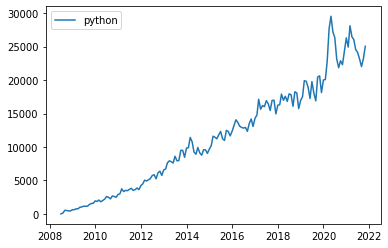

In [41]:
plt.plot(new_df['python'], label='python')
plt.legend()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

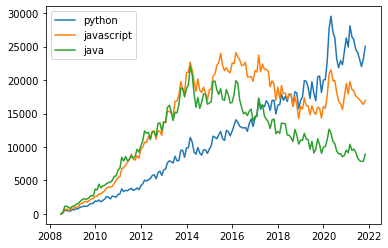

In [42]:
plt.plot(new_df['python'], label='python')
plt.plot(new_df['javascript'], label='javascript')
plt.plot(new_df['java'], label='java')

plt.legend()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [43]:
new_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Language')

In [46]:
for (columnName, columnData) in new_df.iteritems():
  if len(columnName) <= 10:
    new_df[f'Rolling 12 day average for {columnName}'] = new_df[columnName].rolling(12).mean()
new_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift',
       'Rolling 12 day average for assembly', 'Rolling 12 day average for c',
       'Rolling 12 day average for c#', 'Rolling 12 day average for c++',
       'Rolling 12 day average for delphi', 'Rolling 12 day average for go',
       'Rolling 12 day average for java',
       'Rolling 12 day average for javascript',
       'Rolling 12 day average for perl', 'Rolling 12 day average for php',
       'Rolling 12 day average for python', 'Rolling 12 day average for r',
       'Rolling 12 day average for ruby', 'Rolling 12 day average for swift'],
      dtype='object', name='Language')

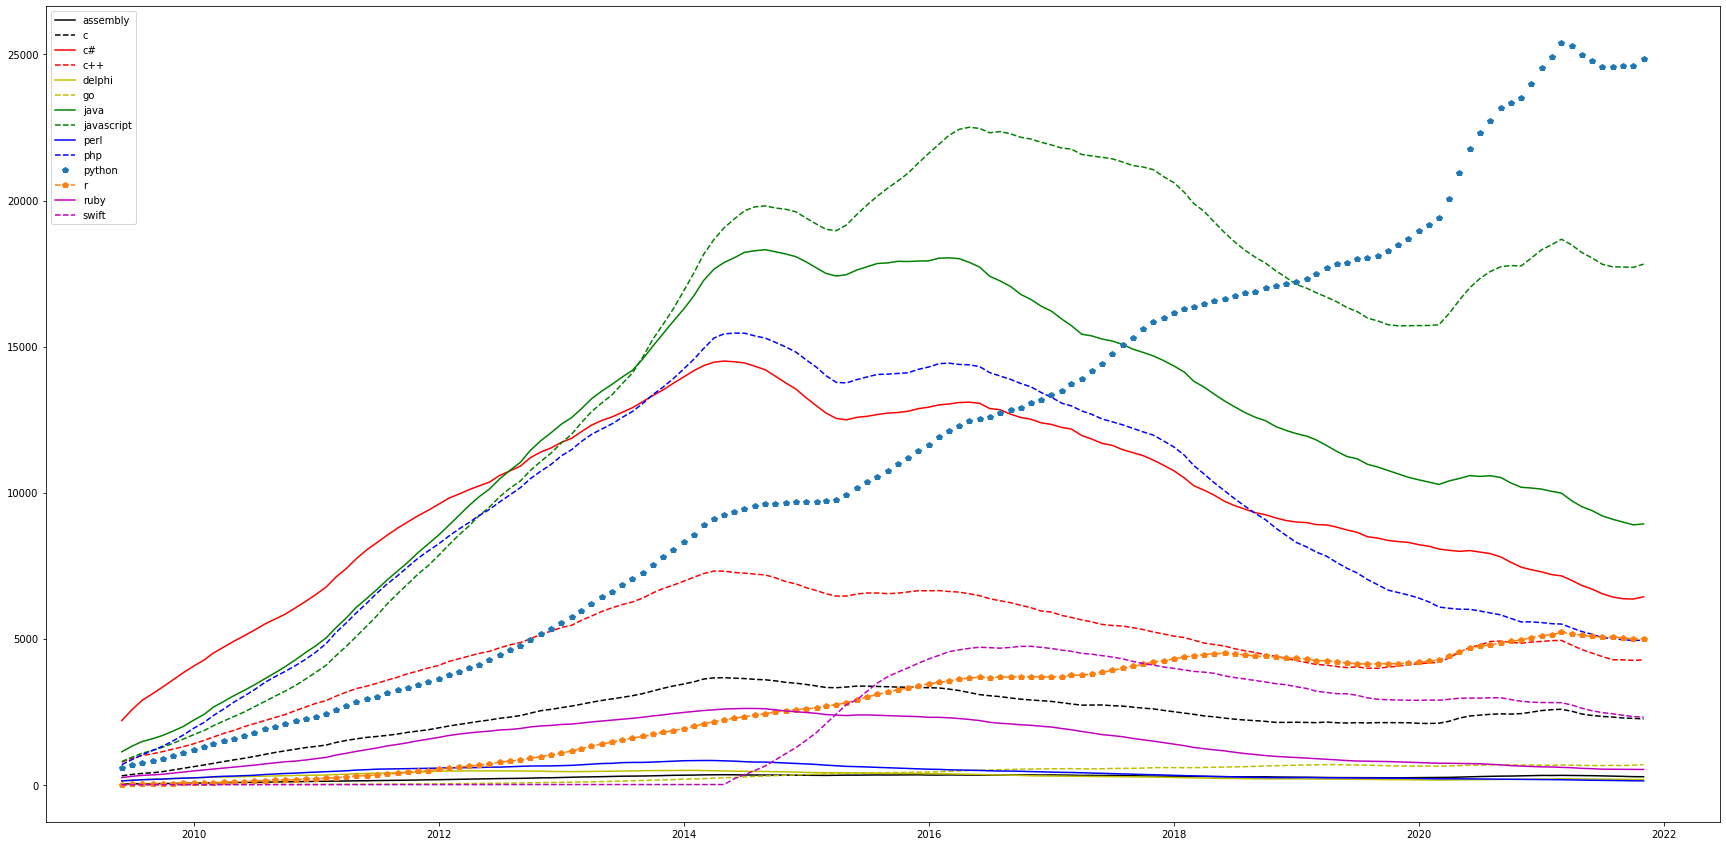

In [62]:
fig, ax = plt.subplots(figsize=(30, 15))
plt.plot(new_df['Rolling 12 day average for assembly'], 'k', label='assembly')
plt.plot(new_df['Rolling 12 day average for c'], 'k--', label='c')
plt.plot(new_df['Rolling 12 day average for c#'], 'r', label='c#')
plt.plot(new_df['Rolling 12 day average for c++'], 'r--', label='c++')
plt.plot(new_df['Rolling 12 day average for delphi'], 'y', label='delphi')
plt.plot(new_df['Rolling 12 day average for go'], 'y--', label='go')
plt.plot(new_df['Rolling 12 day average for java'], 'g', label='java')
plt.plot(new_df['Rolling 12 day average for javascript'], 'g--', label='javascript')
plt.plot(new_df['Rolling 12 day average for perl'], 'b', label='perl')
plt.plot(new_df['Rolling 12 day average for php'], 'b--', label='php')
plt.plot(new_df['Rolling 12 day average for python'], 'p', label='python')
plt.plot(new_df['Rolling 12 day average for r'], 'p--', label='r')
plt.plot(new_df['Rolling 12 day average for ruby'], 'm', label='ruby')
plt.plot(new_df['Rolling 12 day average for swift'], 'm--', label='swift')
plt.legend()





In [51]:
new_df.fillna(value=0)

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift,Rolling 12 day average for assembly,Rolling 12 day average for c,Rolling 12 day average for c#,Rolling 12 day average for c++,Rolling 12 day average for delphi,Rolling 12 day average for go,Rolling 12 day average for java,Rolling 12 day average for javascript,Rolling 12 day average for perl,Rolling 12 day average for php,Rolling 12 day average for python,Rolling 12 day average for r,Rolling 12 day average for ruby,Rolling 12 day average for swift
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-08-01,8.0,83.0,507.0,163.0,14.0,0.0,222.0,163.0,28.0,160.0,122.0,0.0,71.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,539.0,6.0,288.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,509.0,0.0,249.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,503.0,452.0,1.0,159.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,188.0,1719.0,5935.0,3789.0,147.0,650.0,8347.0,17369.0,140.0,4623.0,24139.0,4677.0,500.0,2274.0,303.333333,2338.583333,6537.583333,4387.500000,188.666667,657.166667,9203.166667,17816.000000,150.416667,5037.083333,24580.750000,5052.750000,532.166667,2470.500000
2021-08-01,166.0,1626.0,5770.0,3484.0,141.0,786.0,7971.0,17074.0,119.0,4606.0,23166.0,4577.0,508.0,2208.0,295.083333,2315.916667,6426.833333,4278.333333,185.250000,663.083333,9086.583333,17730.250000,144.333333,5002.833333,24582.583333,5058.583333,528.333333,2429.333333
2021-09-01,197.0,1805.0,5775.0,3927.0,144.0,662.0,7831.0,16742.0,114.0,4341.0,22022.0,4335.0,507.0,1946.0,286.750000,2285.166667,6367.583333,4276.916667,182.916667,657.000000,8990.166667,17723.000000,140.000000,4964.250000,24596.916667,5022.333333,527.583333,2376.500000
